## Requirements

Is the web app accessible via a browser?

Does the web app contain the following?

- at least one header with text
- at least 1 histogram
- at least 1 scatter plot

Create a couple of histograms and scatterplots using plotly-express library.

In [1]:
# Import appropriate packages
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read file
df = pd.read_csv('../vehicles_us.csv')

In [8]:
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,brand
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,x5,NaN,1.0,2018-06-23,19,bmw
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,f-150,white,1.0,2018-10-19,50,ford
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sonata,red,NaN,2019-02-07,79,hyundai
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,f-150,NaN,NaN,2019-03-22,9,ford
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,200,black,NaN,2019-04-02,28,chrysler


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
 13  brand         51525 non-null  object 
 14  maunfacturer  51525 non-null  object 
dtypes: float64(4), int64(2), object(9)
memory usage: 5.9+ MB


In [64]:
# Find brand by splitting 'model' string
df[['brand', 'type']] = df['model'].str.split(' ', n=1, expand= True)

In [65]:
# Find the average odometer of car models plotted against average price
# Select model, brand, price and odometer
o_p = df[['model','brand','price','odometer']]

In [66]:
# Group by model and brand to find the average mean price
o_p_g = o_p.groupby(['model','brand']).mean().reset_index()

In [75]:
# Round price and odometer values to nearest tenth value
o_p_g['price'] = round(o_p_g['price'],-1)
o_p_g['odometer'] = round(o_p_g['odometer'],-1)

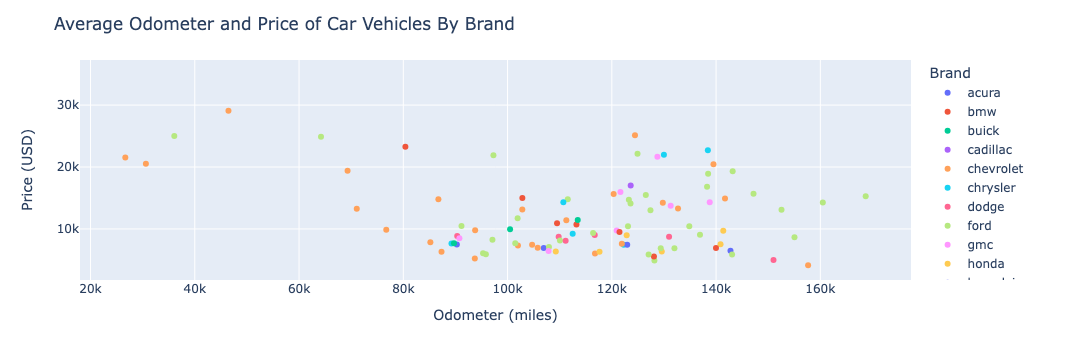

In [76]:
# Create histogram with plot.ly, set odometer and price to x and y respectively, set color to brand
fig = px.scatter( o_p_g, x='odometer', y= 'price', hover_data= 'model', color= 'brand')

# Name axis titles and title
fig.update_layout(xaxis_title='Odometer (miles)', yaxis_title=('Price (USD)'), 
                  title= 'Average Odometer and Price of Car Vehicles By Brand',
                 legend_title = 'Brand')

# Show figure
fig.show()

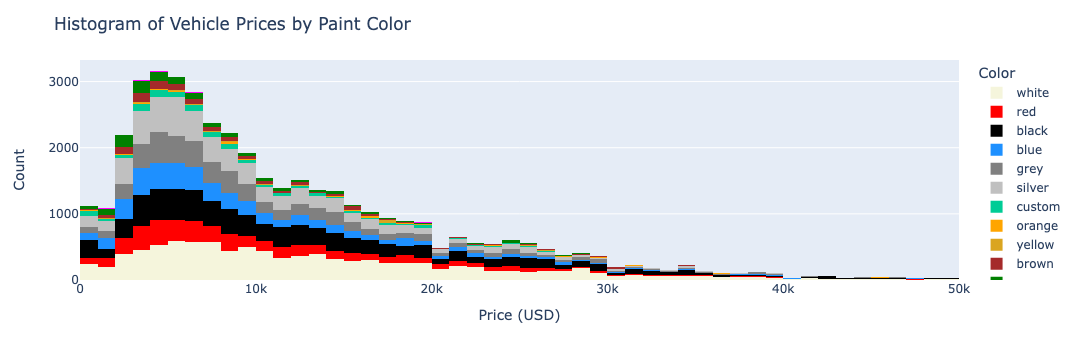

In [61]:
# Create histogram with plot.ly, set x to price and color to paint color, create discrete color map to match colors
fig = px.histogram(df, x='price', color = 'paint_color', nbins= 500,
                   color_discrete_map={"white":"beige", "red":"red", "black":"black", "blue":"dodgerblue", 
                                        "grey":"gray",'silver':'silver','orange':'orange',
                                        "yellow": "goldenrod","brown":"brown","green":"green","purple":"magenta"})

# Rename axis, title and legend
fig.update_layout(xaxis_title='Price (USD)', yaxis_title=('Count'), title= 'Histogram of Vehicle Prices by Paint Color',
                 legend_title = 'Color')
                  #, paper_bgcolor="powderblue")



# Set maximim axes to 50000
fig.update_xaxes(maxallowed=50000)

# Show figure
fig.show()